**Mounting the Google Drive**


In [ ]:
# Mounting of Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Preprocessing**

*Importing Libraries*

In [ ]:
# Importing the Libraries
import pandas as pd
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense,Reshape
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import tensorflow as tf
from pathlib import Path
import cv2
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
import mlxtend
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

*Loading the dataset and image resizing*

In [ ]:
# Loading the training set and resizing the images to 224*224
train_gen=ImageDataGenerator(
                             rescale = 1./255, 
                             validation_split=0.2) # Splitting the validation dataset

train = train_gen.flow_from_directory("/content/drive/My Drive/thesis/Weather2Class/cloudy_sunny/",
                                            class_mode="binary",
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32, subset='training')

Found 64001 images belonging to 2 classes.


In [ ]:
# Configuring the validation set
validation_generator = train_gen.flow_from_directory(
    "/content/drive/My Drive/thesis/Weather2Class/cloudy_sunny/", # same directory as training set
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation')

Found 16000 images belonging to 2 classes.


In [ ]:
# Loading test set and resizing the images to 224*224
test_gen=ImageDataGenerator(
                             rescale = 1./255,)

test = test_gen.flow_from_directory("/content/drive/My Drive/thesis/Weather2Class/test/",
                                            class_mode="binary",
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 10016 images belonging to 2 classes.


**Modeling**

In [ ]:
# Defining the base model as DenseNet169
base_model = densenet.DenseNet169(input_shape=(224, 224, 3),
                                     weights='imagenet',
                                     include_top=False,
                                     pooling='avg')

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
   
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Defining Layers of the model
model = Sequential()
model.add(layers.GlobalAveragePooling2D())
model = Model(base_model.input, predictions)

In [ ]:
# Displaying Model architecture
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# Defining the model specifications
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse'])

*Model Training*

In [ ]:
# Model Training
model_history = model.fit_generator(
    train,
    epochs=32,
    steps_per_epoch=50,
    validation_data = validation_generator,
    validation_steps=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
50/50 [==============================] - 1243s 24s/step - loss: 0.5850 - acc: 0.7199 - mse: 0.1867 - val_loss: 2.3171 - val_acc: 0.6938 - val_mse: 0.2623
Epoch 2/32
50/50 [==============================] - 1176s 23s/step - loss: 0.3819 - acc: 0.8268 - mse: 0.1195 - val_loss: 2.8606 - val_acc: 0.5500 - val_mse: 0.4247
Epoch 3/32
50/50 [==============================] - 1148s 23s/step - loss: 0.4364 - acc: 0.8095 - mse: 0.1346 - val_loss: 0.9493 - val_acc: 0.6469 - val_mse: 0.2757
Epoch 4/32
50/50 [==============================] - 1168s 23s/step - loss: 0.3677 - acc: 0.8393 - mse: 0.1140 - val_loss: 2.5793 - val_acc: 0.5656 - val_mse: 0.4140
Epoch 5/32
50/50 [==============================] - 1137s 23s/step - loss: 0.4222 - acc: 0.8067 - mse: 0.1358 - val_loss: 0.8742 - val_acc: 0.7469 - val_mse: 0.2077
Epoch 6/32
50/50 [==============================] - 1148s 23s/step - loss: 0.4316 - acc: 0.8061 - mse: 0.1378 - val_loss: 0.5527 - val_acc: 0.8250 - val_mse: 0.1458
Epoch 7/32

**Plotting the Model accuracy and loss graph**

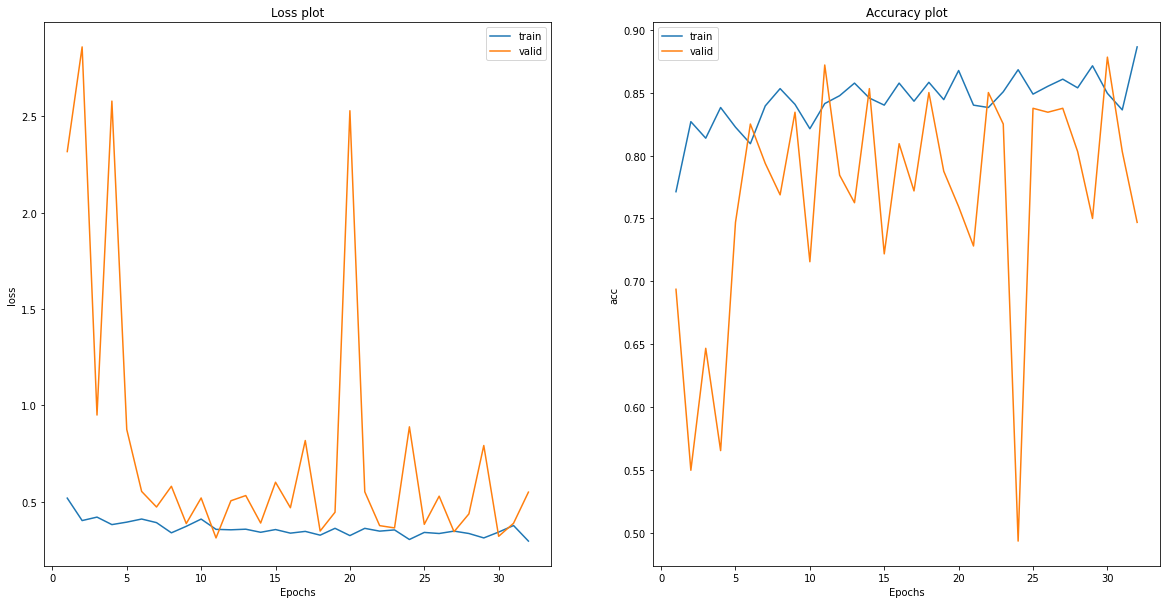

In [ ]:
# Plotting the Model accuracy and loss graph
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']

valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

x = [(i+1) for i in range(len(train_loss))]

f,ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(x, train_loss)
ax[0].plot(x, valid_loss)
ax[0].set_title("Loss plot")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")
ax[0].legend(['train', 'valid'])


ax[1].plot(x, train_acc)
ax[1].plot(x, valid_acc)
ax[1].set_title("Accuracy plot")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("acc")
ax[1].legend(['train', 'valid'])

plt.show()

**Evaluation**

In [ ]:
# Calculating Test accuracy and loss
test_acc = model.evaluate_generator(
    test,
    steps=50,
    verbose=1
)
print(test_acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


50/50 [==============================] - 322s 6s/step - loss: 0.9099 - acc: 0.7212 - mse: 0.2297
[0.9099363684654236, 0.7212499976158142, 0.22969402372837067]
